In [73]:
## This project is using Bactrader to test a trading strategy 
## and backtest it through last Year
## trading strategy is : crossing price with ema 50 to up=Buy

In [74]:
import backtrader as bt
from datetime import datetime, timedelta
import yfinance as yf
%matplotlib inline

In [75]:
cerebro=bt.Cerebro() ## cerebro is a class that handels and initiate backtrader library


In [76]:
import pandas as pd


end_date = datetime.today()
start_date = end_date - timedelta(days=365)

df = yf.download('BTC-USD', start=str(start_date.date()), end=str(end_date.date()))

# here columns are in multiindex type --> ("AAPLE","Open")

df.columns = df.columns.droplevel('Ticker')
## we delete "APPLE" from the column --> remained ('Open')

df.columns = [col.lower() for col in df.columns]
# this line converts ('Open') -> ('open')

# now we can use the dataframe to our purposes

C:\Users\fardi\AppData\Local\Temp\ipykernel_9572\3198290157.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('BTC-USD', start=str(start_date.date()), end=str(end_date.date()))
[*********************100%***********************]  1 of 1 completed


In [77]:
feed=bt.feeds.PandasData(dataname=df)
#This code converts a pandas DataFrame (df) into a Backtrader data feed for use in trading strategies.

In [78]:
cerebro.adddata(feed)
#adds the data feed (created from the pandas DataFrame) to the Backtrader engine (cerebro) so it can be used in backtesting.

In [79]:
class EmaCross(bt.Strategy):
    

    def __init__(self):
        ema = bt.ind.EMA(period=50)  # 50 moving average
        price=self.data
        self.crossover = bt.ind.CrossOver(price,ema)  # crossover signal
    
    #this function is started automutically (deos not need call)
    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if price crosses ema 50 to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position

In [80]:
cerebro.addstrategy(EmaCross)

0

In [81]:
cerebro.addsizer(bt.sizers.PercentSizer,percents=20)

# change default volume of entering the trade
# to 20% of all available money account

In [82]:
cerebro.run()

<IPython.core.display.Javascript object>


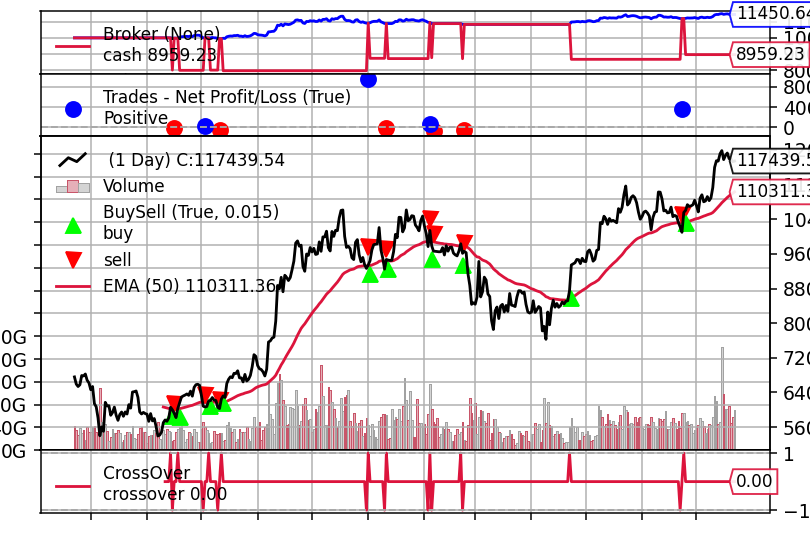

[[<Figure size 432x288 with 5 Axes>]]

In [83]:
cerebro.plot()